## Imports

In [2]:
from keras.layers import Dense
from tensorflow.keras import regularizers
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import scipy.sparse 
from matplotlib import pyplot as plt


from transformers import AutoTokenizer, AutoModel, pipeline
import tensorflow_hub as hub
import torch

import pandas as pd
import numpy as np 
import pickle
 

## Loading Data

### ClinicalBERT Pooled Embeddings

In [2]:
embeddings = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_CORe_pooled_embeddings_68k.npy')
labels = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_CORe_pooled_labels_68k.npy')


In [3]:
train_X, test_X, train_y, test_y = train_test_split(embeddings, labels, test_size=0.20, random_state=42, stratify=labels)
del embeddings
del labels

In [4]:
train_X.shape

(54200, 768)

In [5]:
test_X.shape

(13550, 768)

## Define Keras Model

In [3]:
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT", model_max_length=264)
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")


Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


---

In [6]:
inputs = tf.keras.layers.Input(shape=(train_X.shape[1],))
classification_out = tf.keras.layers.Dense(4, activation='softmax')(inputs)

model_functional = tf.keras.models.Model(inputs=inputs, outputs = classification_out)
model_functional.compile(loss='SparseCategoricalCrossentropy', 
                         optimizer='adam', 
                         metrics=['sparse_categorical_accuracy'])


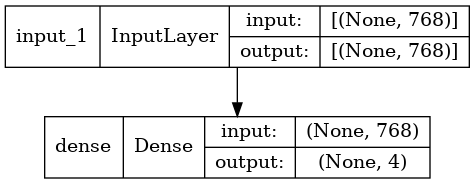

In [7]:
tf.keras.utils.plot_model(model_functional, show_shapes = True)


In [8]:
train = model_functional.fit(train_X, train_y, epochs=50, validation_split=0.2)


Epoch 1/50
1355/1355 [==============================] - 3s 2ms/step - loss: 1.4159 - sparse_categorical_accuracy: 0.2477 - val_loss: 1.4192 - val_sparse_categorical_accuracy: 0.2486
Epoch 2/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4144 - sparse_categorical_accuracy: 0.2473 - val_loss: 1.4598 - val_sparse_categorical_accuracy: 0.2512
Epoch 3/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4110 - sparse_categorical_accuracy: 0.2542 - val_loss: 1.4260 - val_sparse_categorical_accuracy: 0.2538
Epoch 4/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4124 - sparse_categorical_accuracy: 0.2500 - val_loss: 1.4070 - val_sparse_categorical_accuracy: 0.2444
Epoch 5/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4112 - sparse_categorical_accuracy: 0.2545 - val_loss: 1.4106 - val_sparse_categorical_accuracy: 0.2459
Epoch 6/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4125 - spars

Epoch 46/50
1355/1355 [==============================] - 2s 1ms/step - loss: 1.4067 - sparse_categorical_accuracy: 0.2606 - val_loss: 1.4157 - val_sparse_categorical_accuracy: 0.2499
Epoch 47/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4061 - sparse_categorical_accuracy: 0.2644 - val_loss: 1.4172 - val_sparse_categorical_accuracy: 0.2477
Epoch 48/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4096 - sparse_categorical_accuracy: 0.2594 - val_loss: 1.4501 - val_sparse_categorical_accuracy: 0.2487
Epoch 49/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4073 - sparse_categorical_accuracy: 0.2632 - val_loss: 1.4435 - val_sparse_categorical_accuracy: 0.2475
Epoch 50/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4060 - sparse_categorical_accuracy: 0.2663 - val_loss: 1.4386 - val_sparse_categorical_accuracy: 0.2473


In [9]:
test = model_functional.evaluate(test_X, test_y)


424/424 [==============================] - 0s 952us/step - loss: 1.4370 - sparse_categorical_accuracy: 0.2503


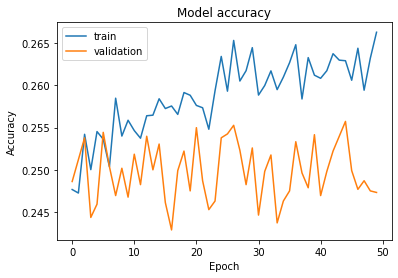

In [10]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Hardly any learning at all, very unstable. Might need to increase learning rate.

---

In [8]:
train = model_functional.fit(train_X, train_y, epochs=25, validation_split=0.2)


Epoch 1/25
1355/1355 [==============================] - 3s 2ms/step - loss: 1.4151 - sparse_categorical_accuracy: 0.2494 - val_loss: 1.4105 - val_sparse_categorical_accuracy: 0.2479
Epoch 2/25
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4116 - sparse_categorical_accuracy: 0.2534 - val_loss: 1.3961 - val_sparse_categorical_accuracy: 0.2505
Epoch 3/25
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4131 - sparse_categorical_accuracy: 0.2499 - val_loss: 1.4245 - val_sparse_categorical_accuracy: 0.2539
Epoch 4/25
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4102 - sparse_categorical_accuracy: 0.2518 - val_loss: 1.3933 - val_sparse_categorical_accuracy: 0.2530
Epoch 5/25
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4155 - sparse_categorical_accuracy: 0.2529 - val_loss: 1.3995 - val_sparse_categorical_accuracy: 0.2534
Epoch 6/25
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4103 - spars

In [52]:
test = model_functional.predict(test_X[0:20])

In [53]:
np.argmax(test, axis=1)

array([3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 1, 3])

In [55]:
test_y[0:20]

array([1, 3, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 3, 2, 1, 2, 2, 1, 2, 2])